# IBM Employee Attrition Data
Quang Lam

Purpose: 
* Explore the HR dataset from IBM
* Develop Machine Learning Model to find attributes that predict employees' attrition

## 1. Import package and dataset

In [27]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#read csv data file
df = pd.read_csv('D:\Download\Compressed\HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
df.shape #Data contains 1470 observations with 34 attributes and 1 target

(1470, 35)

## 2. Explore Data

### 2a. Preprocessing Data

In [30]:
#Find missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [31]:
#Remove duplicated observations
df.drop_duplicates()
df.shape

(1470, 35)

In [32]:
#Check all column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
#Check Data types 
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [34]:
print(df.Gender.unique())
print(df.MaritalStatus.unique())

['Female' 'Male']
['Single' 'Married' 'Divorced']


In [35]:
#mapping categorical value to numerical value
df['Attrition']=df.Attrition.map({'Yes': 1, 'No':0})
df['Gender']=df.Gender.map({'Female': 1, 'Male':0})
df['MaritalStatus']=df.MaritalStatus.map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [38]:
#All features dataframe
cols = ['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 
 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction',
 'MaritalStatus', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction',
'WorkLifeBalance', 'YearsAtCompany']
df = df[cols]
df_all = df.drop('Attrition', axis = 1)
df_all.head()
df_all.shape

(1470, 15)

### 2b. Explore Data

In [39]:
#Descriptive statistics
df_all.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,0.400000,65.891156,2.729932,2.728571,0.902721,6502.931293,3.153741,2.712245,2.761224,7.008163
std,9.135373,403.509100,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,1.102846,0.730121,4707.956783,0.360824,1.081209,0.706476,6.126525
min,18.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1009.000000,3.000000,1.000000,1.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,2.000000,0.000000,2911.000000,3.000000,2.000000,2.000000,3.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,0.000000,66.000000,3.000000,3.000000,1.000000,4919.000000,3.000000,3.000000,3.000000,5.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,4.000000,1.000000,8379.000000,3.000000,4.000000,3.000000,9.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,4.000000,2.000000,19999.000000,4.000000,4.000000,4.000000,40.000000


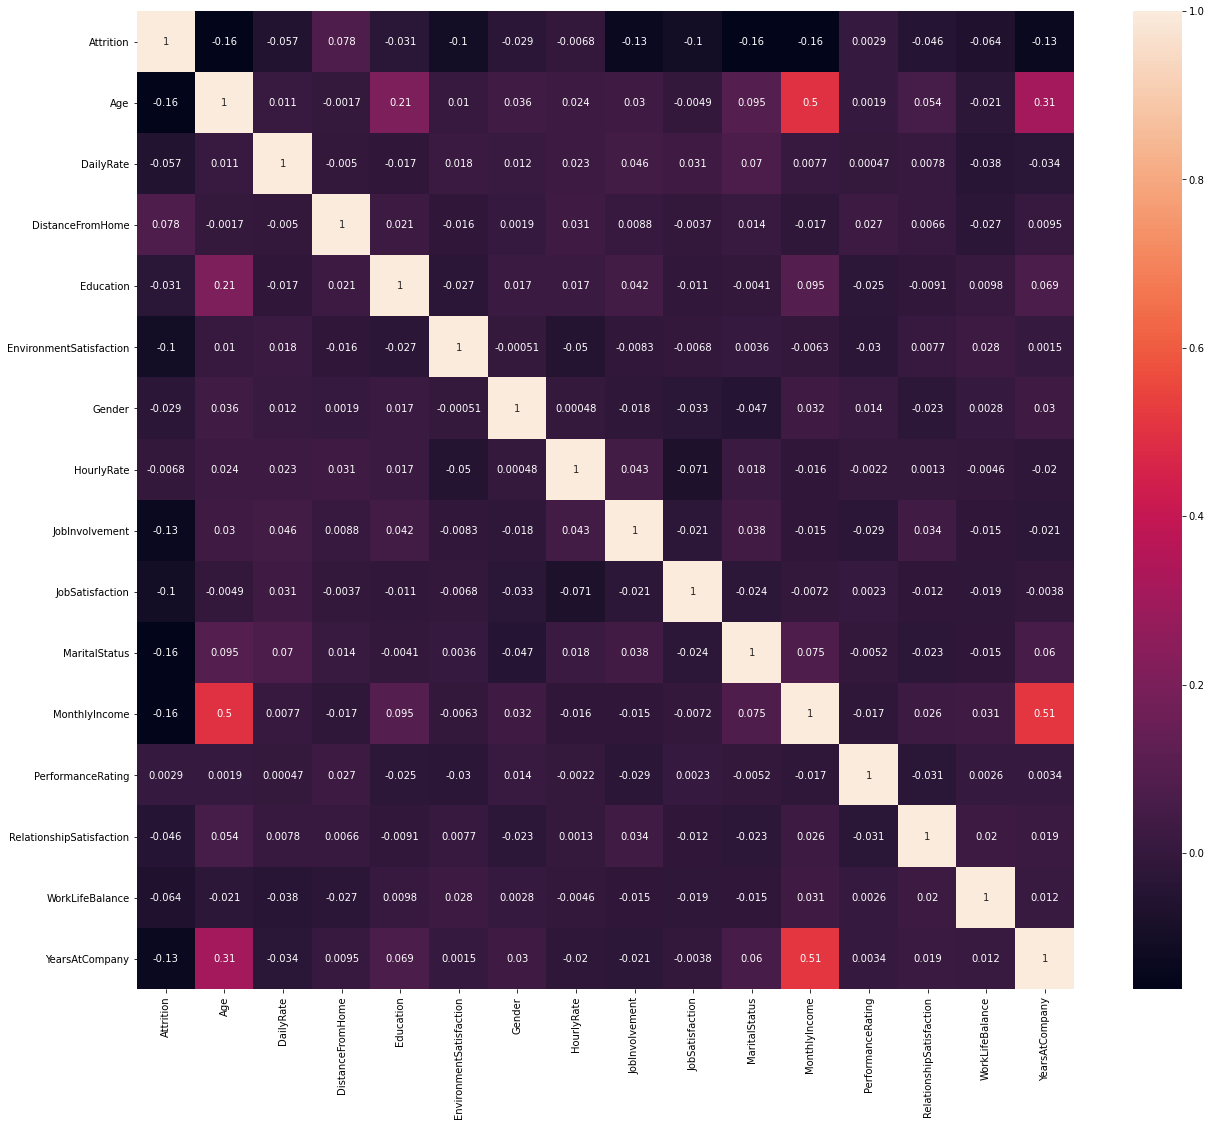

In [44]:
#Correlation matrix between variables
plt.figure(figsize=(21, 18))
ax = sns.heatmap(df.corr(), annot = True)
plt.show()

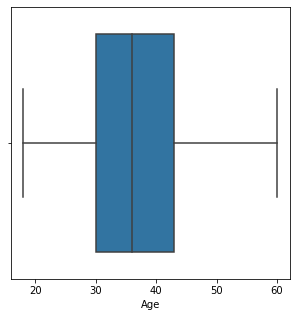

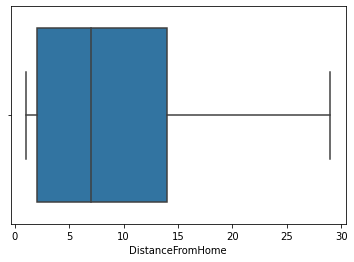

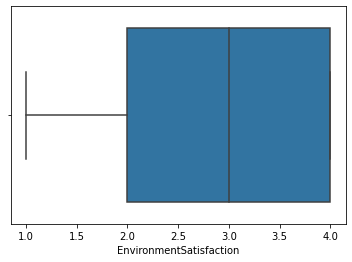

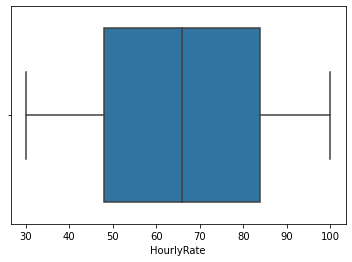

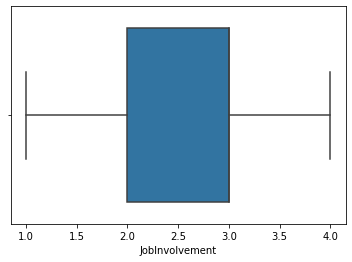

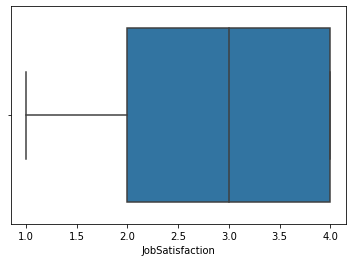

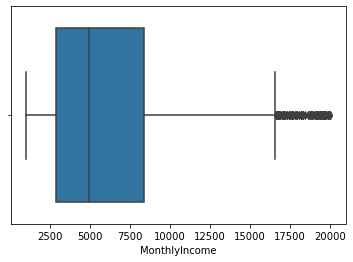

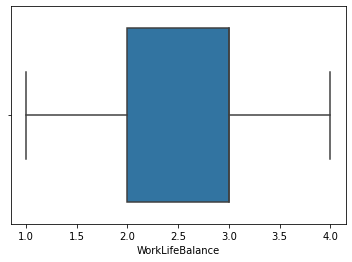

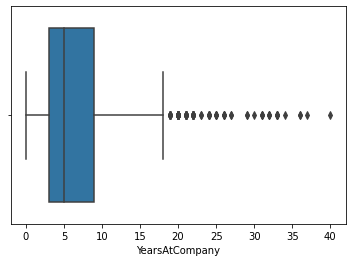

In [47]:
#Boxplot and detect outliers
lst = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 
       'MonthlyIncome','WorkLifeBalance', 'YearsAtCompany']
plt.figure(figsize=(5, 5))
for i in lst:
    sns.boxplot(x = df[i])
    plt.show()

##  3. Machine Learning
* Select features with Recursive Feature Elimination
*Unsupervised machine learning method: Decision Tree Classifier

Install ML components

In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install six

In [15]:
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [18]:
#Select Target column
df_target = df['Attrition']
df_target.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [19]:
#Features selection with RFE
model = LogisticRegression(solver='lbfgs', max_iter=3000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(df_all, df_target)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False  True False False  True  True  True False False
 False  True False]
Feature Ranking: [ 5 10  7  8  1  2  9  1  1  1 11  6  3  1  4]


In [17]:
#Select top 5 features based on RFE
features = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance']
df_features = df_all[features]
df_features.head()

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MaritalStatus,WorkLifeBalance
0,2,3,4,0,1
1,3,2,2,1,3
2,4,2,3,0,3
3,4,3,3,1,3
4,1,3,2,1,3


In [20]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 1)

In [21]:
#Fit Decision Tree Classifier Model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [22]:
#Accuracy score of the model
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.8253968253968254


In [23]:
#Decision Tree Visualization
import graphviz
from six import StringIO  
from IPython.display import Image
import pydotplus
from sklearn import tree

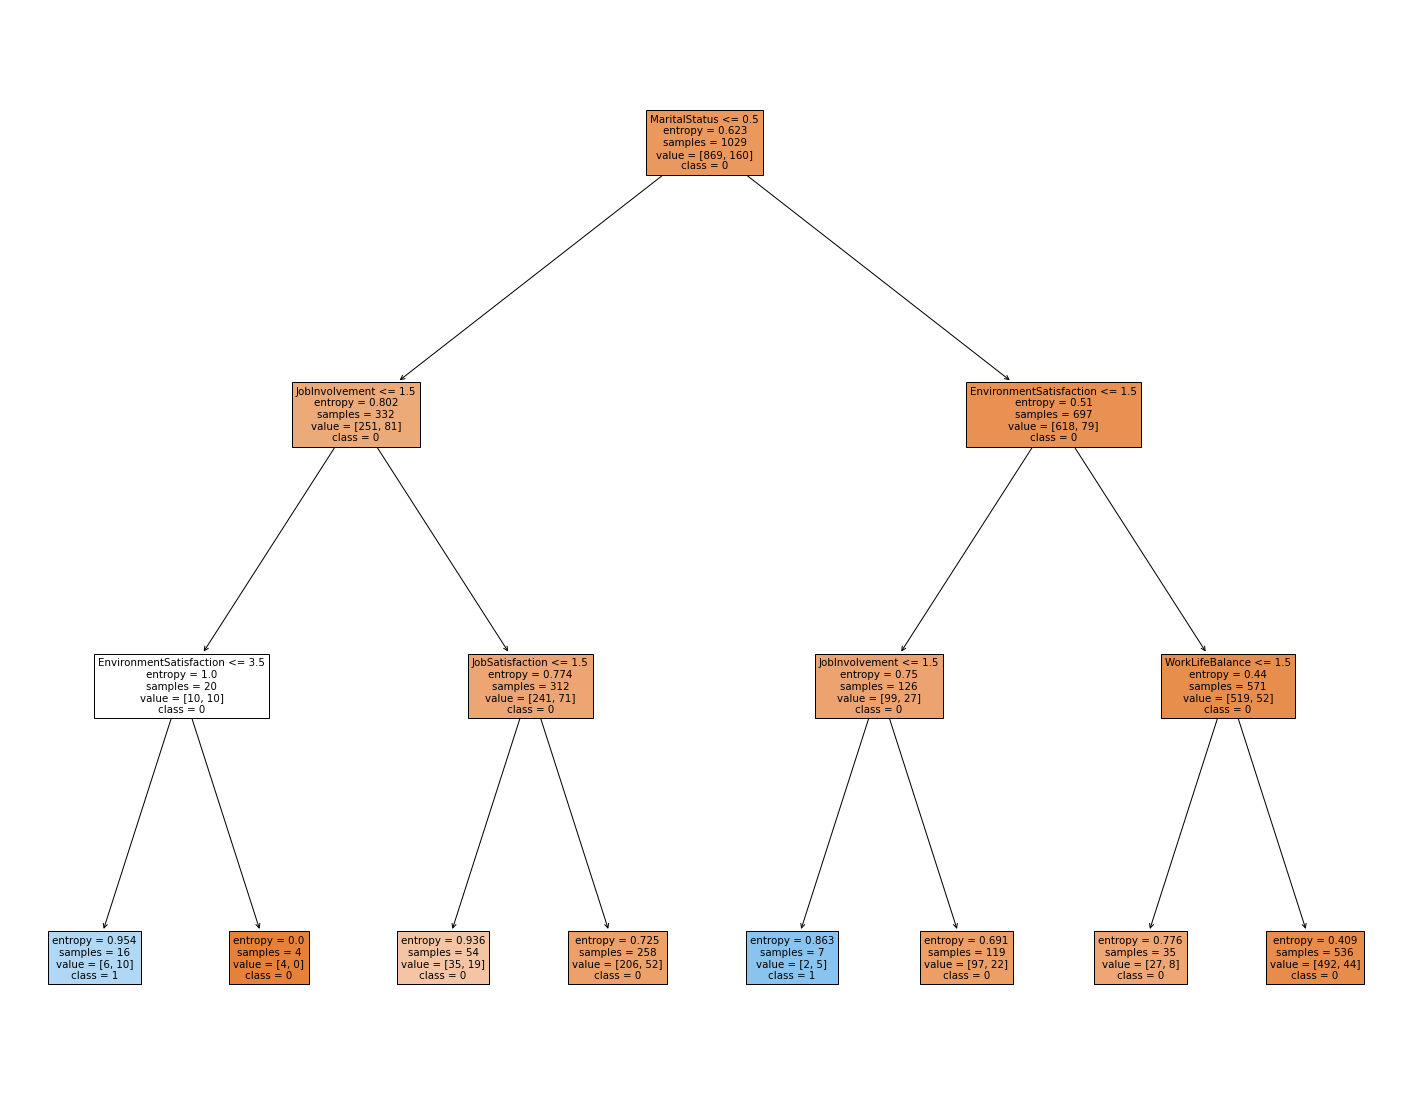

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=['0', '1'],
                   filled=True)

In [ ]:
#Save figure
fig.savefig("decistion_tree1.png")